<a href="https://colab.research.google.com/github/Raghuramas94/PROJECT-1/blob/master/Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


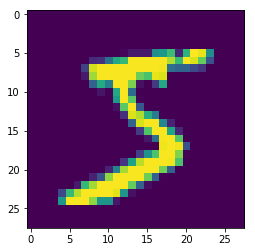

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(20, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(15, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(20, 3, 3, activation='relu')) # 9

#model.add(MaxPooling2D(pool_size=(2, 2))) # 10

model.add(Convolution2D(15, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #9
model.add(BatchNormalization())

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 20)        80        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 15)        2715      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 15)        60        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 10)        1360      
_________________________________________________________________
batch_normalization_8 (Batch (None, 22, 22, 10)        40        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 10)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.1331 - acc: 0.9596
Epoch 2/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0489 - acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0384 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0324 - acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0278 - acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0233 - acc: 0.9924
Epoch 7/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0217 - acc: 0.9929
Epoch 8/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0190 - acc: 0.9935
Epoch 9/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.0163 - acc: 0.9947
Epoch 10/10
60000/60000 [==============================] - 18s 293us/step - loss: 

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

60000/60000 [==============================] - 18s 305us/step - loss: 0.0132 - acc: 0.9957
Epoch 3/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.0122 - acc: 0.9956
Epoch 4/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0108 - acc: 0.9961
Epoch 5/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0100 - acc: 0.9969
Epoch 6/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.0083 - acc: 0.9971
Epoch 7/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0094 - acc: 0.9968
Epoch 8/20
60000/60000 [==============================] - 19s 316us/step - loss: 0.0075 - acc: 0.9976
Epoch 9/20
Epoch 9/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.0071 - acc: 0.9975
Epoch 10/20
60000/60000 [==============================] - 18s 296us/step - loss: 0.0070 - acc: 0.9976
Epoch 11/20Epoch 11/20
60000/60000 [==============================] - 18s 295us/s

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.034642029773580295, 0.9916]
[0.034642029773580295, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.10431452e-19 4.54350167e-16 1.48198606e-11 1.34874657e-14
  1.59903499e-19 4.72377968e-21 8.97861662e-25 1.00000000e+00
  1.20775181e-19 4.70248230e-14]
 [6.65932750e-16 7.66464529e-13 1.00000000e+00 2.55739973e-16
  3.04770925e-17 5.59650086e-22 5.14389353e-14 8.76224688e-22
  6.84007992e-20 6.02293921e-20]
 [3.12168381e-11 1.00000000e+00 4.84401177e-08 3.74255104e-14
  7.09671211e-10 2.24495908e-11 3.89717703e-11 2.22047693e-11
  1.91197478e-14 1.79598610e-11]
 [9.99997973e-01 1.53877458e-15 2.15588813e-09 9.49654765e-12
  7.44740380e-12 2.56056391e-11 1.85998408e-06 3.86361570e-13
  1.55633959e-08 1.11967147e-07]
 [1.84884846e-15 1.05838255e-11 4.29157035e-13 7.39414847e-18
  1.00000000e+00 1.81361930e-17 3.49058254e-15 8.73667814e-15
  1.87580677e-13 1.71634332e-10]
 [1.11009795e-11 9.99999881e-01 9.78119630e-08 1.19596618e-16
  6.31310115e-10 1.48335374e-16 1.66085299e-12 1.09230713e-09
  2.95428194e-15 3.27170201e-11]
 [1.42370555e-23 7.58660956e-09 4.17223493e-13 4.95236278e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()